# Data Wrangling on Bike Sharing Dataset
1. Concat data of 2011.
 * standadize column names.
 * drop rows with duplicate and missing value.
 * concat DataFrames.
2. Find outliers.
 * convert duration(str) to duration_in_sec(int). 
 * find outliers and drop them.
3. Extract station name.
4. Save result to csv file.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import glob
import re

# Concate the data sets

__ 1. Load files from globing to pandas. __

In [2]:
csv_files = glob.glob('data/2011*.csv')
csv_files

['data/2011-Q1-cabi-trip-history-data.csv',
 'data/2011-Q2-cabi-trip-history-data.csv',
 'data/2011-Q3-cabi-trip-history-data.csv',
 'data/2011-Q4-cabi-trip-history-data.csv']

In [3]:
new = pd.read_csv(csv_files[0])

In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150071 entries, 0 to 150070
Data columns (total 7 columns):
Duration         150071 non-null object
Start date       150071 non-null object
End date         150071 non-null object
Start station    150071 non-null object
End station      150060 non-null object
Bike#            150071 non-null object
Member Type      150071 non-null object
dtypes: object(7)
memory usage: 8.0+ MB


__ 2. Concat DataFrame from files __

In [5]:
list_data = []
# load the data frame.
# standardize column name, drop duplicates rows and rows with missing values.
# append DataFrames to a list.
# concat the DataFrame
for filename in csv_files:
    data = pd.read_csv(filename)
    data.columns = ['duration','start_date','end_date','start_station','end_station','bike#','member_type']
    data = data.drop_duplicates()
    data = data.dropna()
    list_data.append(data)
df = pd.concat(list_data, ignore_index=True)

In [6]:
df.head()

,duration,start_date,end_date,start_station,end_station,bike#,member_type
0,0h 1min. 50sec.,3/31/2011 23:58,4/1/2011 0:00,14th & Harvard St NW (31105),16th & Harvard St NW (31103),W00749,Registered
1,0h 16min. 21sec.,3/31/2011 23:52,4/1/2011 0:08,19th & L St NW (31224),7th & Water St SW / SW Waterfront (31609),W01048,Casual
2,0h 3min. 19sec.,3/31/2011 23:47,3/31/2011 23:50,Lincoln Park / 13th & East Capitol St NE (31619),13th & H St NE (31611),W00340,Registered
3,0h 5min. 44sec.,3/31/2011 23:45,3/31/2011 23:50,14th & R St NW (31202),Massachusetts Ave & Dupont Circle NW (31200),W00981,Registered
4,0h 8min. 42sec.,3/31/2011 23:34,3/31/2011 23:43,Park Rd & Holmead Pl NW (31602),15th & P St NW (31201),W00449,Registered


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240421 entries, 0 to 1240420
Data columns (total 7 columns):
duration         1240421 non-null object
start_date       1240421 non-null object
end_date         1240421 non-null object
start_station    1240421 non-null object
end_station      1240421 non-null object
bike#            1240421 non-null object
member_type      1240421 non-null object
dtypes: object(7)
memory usage: 66.2+ MB


## Find the Outliers

The upper_whisker is 2204s.

__ 1. Convert the duration from object to integer. __

In [8]:
# Reformat the "duration" to "hh:mm:ss" and store in good_time_str
def get_time(time_str):
    matches = re.findall('\d+',time_str)
    return matches[0]+':'+matches[1]+':'+matches[2]

# Conver the good_time_str to integer which is the duration in seconds. 
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

good_time_str = df.duration.apply(get_time)
good_time_str = good_time_str.apply(get_sec)

# Add the series to the DataFrame as column "duration_in_sec"
df['duration_in_sec'] = good_time_str

In [9]:
df.head()

,duration,start_date,end_date,start_station,end_station,bike#,member_type,duration_in_sec
0,0h 1min. 50sec.,3/31/2011 23:58,4/1/2011 0:00,14th & Harvard St NW (31105),16th & Harvard St NW (31103),W00749,Registered,110
1,0h 16min. 21sec.,3/31/2011 23:52,4/1/2011 0:08,19th & L St NW (31224),7th & Water St SW / SW Waterfront (31609),W01048,Casual,981
2,0h 3min. 19sec.,3/31/2011 23:47,3/31/2011 23:50,Lincoln Park / 13th & East Capitol St NE (31619),13th & H St NE (31611),W00340,Registered,199
3,0h 5min. 44sec.,3/31/2011 23:45,3/31/2011 23:50,14th & R St NW (31202),Massachusetts Ave & Dupont Circle NW (31200),W00981,Registered,344
4,0h 8min. 42sec.,3/31/2011 23:34,3/31/2011 23:43,Park Rd & Holmead Pl NW (31602),15th & P St NW (31201),W00449,Registered,522


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240421 entries, 0 to 1240420
Data columns (total 8 columns):
duration           1240421 non-null object
start_date         1240421 non-null object
end_date           1240421 non-null object
start_station      1240421 non-null object
end_station        1240421 non-null object
bike#              1240421 non-null object
member_type        1240421 non-null object
duration_in_sec    1240421 non-null int64
dtypes: int64(1), object(7)
memory usage: 75.7+ MB


__ 2. Draw a box plot and find the wiskers. __

In [11]:
df.duration_in_sec.describe()

count    1.240421e+06
mean     1.195695e+03
std      4.593984e+03
min      0.000000e+00
25%      4.070000e+02
50%      6.760000e+02
75%      1.126000e+03
max      3.356405e+06
Name: duration_in_sec, dtype: float64

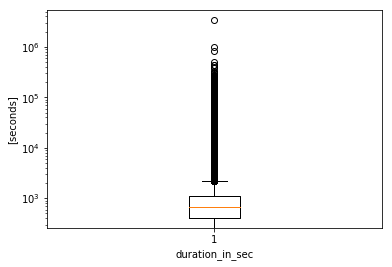

In [12]:
db = plt.boxplot(df.duration_in_sec)
plt.yscale('log')
plt.ylabel('[seconds]')
plt.xlabel('duration_in_sec')
plt.show()

__ Upper_whisker is obtained from the box plot. __

In [13]:
upper_whisker = db['whiskers'][1].get_data()[1][1]

In [14]:
upper_whisker

2204.0

__ The lower_whisker is set to 20 instead of 0. __

In [15]:
lower_whisker = 20

__ 3. Remove the outliers. __ 

In [16]:
inlier_1 = (df.duration_in_sec <upper_whisker)

In [17]:
# number of outlier above upper whisker is 103298.
inlier_1.value_counts()

True     1137123
False     103298
Name: duration_in_sec, dtype: int64

In [18]:
df = df[df.duration_in_sec < upper_whisker]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137123 entries, 0 to 1240420
Data columns (total 8 columns):
duration           1137123 non-null object
start_date         1137123 non-null object
end_date           1137123 non-null object
start_station      1137123 non-null object
end_station        1137123 non-null object
bike#              1137123 non-null object
member_type        1137123 non-null object
duration_in_sec    1137123 non-null int64
dtypes: int64(1), object(7)
memory usage: 78.1+ MB


In [20]:
# number of outlier below the lower whisker is 9455.
inlier_2 = (df.duration_in_sec < lower_whisker)
inlier_2.value_counts()

False    1127668
True        9455
Name: duration_in_sec, dtype: int64

In [21]:
df = df[df.duration_in_sec > lower_whisker]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127471 entries, 0 to 1240420
Data columns (total 8 columns):
duration           1127471 non-null object
start_date         1127471 non-null object
end_date           1127471 non-null object
start_station      1127471 non-null object
end_station        1127471 non-null object
bike#              1127471 non-null object
member_type        1127471 non-null object
duration_in_sec    1127471 non-null int64
dtypes: int64(1), object(7)
memory usage: 77.4+ MB


# Extract the station name. 

__ 1. check whether all station entries has a code. __

In [22]:
# check whether all start_station entries has a code.
def check_code(station_str):
    matches = re.findall('\(\d+\)', station_str)
    return len(matches) != 0
start_station_with_code = df.start_station.apply(check_code)
end_station_with_code = df.end_station.apply(check_code)
print(start_station_with_code.value_counts())
print(end_station_with_code.value_counts())

True    1127471
Name: start_station, dtype: int64
True    1127471
Name: end_station, dtype: int64


__ 2. Extract the start and end station name, add to the DataFrame. __

In [23]:
# Extracting the name of station. 
def get_name(station_str):
    matches = re.findall('\(\d+\)', station_str)
    code_str = matches[0]
    name_str = station_str.replace(code_str,'')
    return name_str

start_station_name = df.start_station.apply(get_name)
end_station_name = df.end_station.apply(get_name)

In [24]:
# remove the leading and trailing spaces. 
start_station_name = start_station_name.apply(lambda n: n.strip())
end_station_name = end_station_name.apply(lambda n: n.strip())

In [25]:
start_station_name[:5]

0                        14th & Harvard St NW
1                              19th & L St NW
2    Lincoln Park / 13th & East Capitol St NE
3                              14th & R St NW
4                     Park Rd & Holmead Pl NW
Name: start_station, dtype: object

In [26]:
end_station_name[:5]

0                    16th & Harvard St NW
1       7th & Water St SW / SW Waterfront
2                          13th & H St NE
3    Massachusetts Ave & Dupont Circle NW
4                          15th & P St NW
Name: end_station, dtype: object

In [27]:
df['start_station_name'] = start_station_name
df['end_station_name'] = end_station_name

In [28]:
df.head()

,duration,start_date,end_date,start_station,end_station,bike#,member_type,duration_in_sec,start_station_name,end_station_name
0,0h 1min. 50sec.,3/31/2011 23:58,4/1/2011 0:00,14th & Harvard St NW (31105),16th & Harvard St NW (31103),W00749,Registered,110,14th & Harvard St NW,16th & Harvard St NW
1,0h 16min. 21sec.,3/31/2011 23:52,4/1/2011 0:08,19th & L St NW (31224),7th & Water St SW / SW Waterfront (31609),W01048,Casual,981,19th & L St NW,7th & Water St SW / SW Waterfront
2,0h 3min. 19sec.,3/31/2011 23:47,3/31/2011 23:50,Lincoln Park / 13th & East Capitol St NE (31619),13th & H St NE (31611),W00340,Registered,199,Lincoln Park / 13th & East Capitol St NE,13th & H St NE
3,0h 5min. 44sec.,3/31/2011 23:45,3/31/2011 23:50,14th & R St NW (31202),Massachusetts Ave & Dupont Circle NW (31200),W00981,Registered,344,14th & R St NW,Massachusetts Ave & Dupont Circle NW
4,0h 8min. 42sec.,3/31/2011 23:34,3/31/2011 23:43,Park Rd & Holmead Pl NW (31602),15th & P St NW (31201),W00449,Registered,522,Park Rd & Holmead Pl NW,15th & P St NW


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127471 entries, 0 to 1240420
Data columns (total 10 columns):
duration              1127471 non-null object
start_date            1127471 non-null object
end_date              1127471 non-null object
start_station         1127471 non-null object
end_station           1127471 non-null object
bike#                 1127471 non-null object
member_type           1127471 non-null object
duration_in_sec       1127471 non-null int64
start_station_name    1127471 non-null object
end_station_name      1127471 non-null object
dtypes: int64(1), object(9)
memory usage: 94.6+ MB


# Save to csv file 

In [30]:
df_final = df[['start_date','end_date','duration_in_sec','start_station_name','end_station_name','bike#','member_type']]

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127471 entries, 0 to 1240420
Data columns (total 7 columns):
start_date            1127471 non-null object
end_date              1127471 non-null object
duration_in_sec       1127471 non-null int64
start_station_name    1127471 non-null object
end_station_name      1127471 non-null object
bike#                 1127471 non-null object
member_type           1127471 non-null object
dtypes: int64(1), object(6)
memory usage: 68.8+ MB


In [34]:
df_final.to_csv('data/2011-cabi-trip-history-data.csv', index = False)

In [35]:
# takes 5 min 37 sec to parse the datetime.
df_new = pd.read_csv('data/2011-cabi-trip-history-data.csv',parse_dates=[0,1])

In [37]:
df_new.to_csv('data/2011-cabi-trip-history-data-final.csv', index = False)

In [40]:
# takes 5 sec to parse the datetime. 
df_new_2 = pd.read_csv('data/2011-cabi-trip-history-data-final.csv',parse_dates=[0,1])

In [41]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127471 entries, 0 to 1127470
Data columns (total 7 columns):
start_date            1127471 non-null datetime64[ns]
end_date              1127471 non-null datetime64[ns]
duration_in_sec       1127471 non-null int64
start_station_name    1127471 non-null object
end_station_name      1127471 non-null object
bike#                 1127471 non-null object
member_type           1127471 non-null object
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 60.2+ MB
